# <font color="bordo">Programming Exercise 1 - Logistic Regression</font>
<p>
In this exercise, you will implement logistic regression and apply it to two
different datasets.
<p>
In the first part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.
<p>
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission 
<br>based on their results on two exams. 
<p>
You have historical data from previous applicants
that you can use as a training set for logistic regression. 
<br>
For each training example, you have the applicant’s scores on two exams and the admissions decision.
<br>
Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%matplotlib inline

In [21]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:]) # print data samples
    return(data)

In [22]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

### Load data
<a id='loading_data'></a>

In [23]:
data = loaddata('data/ex2data1.txt', ',')

Dimensions:  (100, 3)
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [24]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

# np.c_ Translates slice objects to concatenation along the second axis.
# Example: np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
# >>> array([[1, 2, 3, 0, 0, 4, 5, 6]])

### Plotting the data
<a id='ploting_data'></a>
<p>
Before starting to implement any learning algorithm, it is always good to
visualize the data if possible.

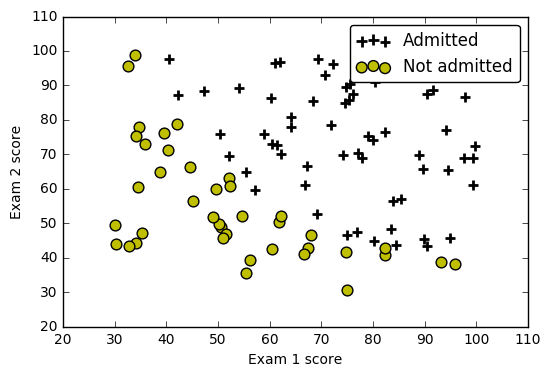

In [25]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

### Cost Function
<a id='cost_function'></a>
<p>
<font size="3em">$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$</font>
<p>
Vectorized Cost Function
<p>
<font size="3em">$J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$</font>

In [26]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [27]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

### Gradient Descent
<a id='gradient_descent'></a>

<p>
Partial derivative
<p>

<font size="3em">
$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}$
</font>

<p>
Vectorized
<p>

<font size="3em">
$\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$
</font>

In [28]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [29]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


### Optimize the cost function
<a id='optimize_cost'></a>

In [34]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

SyntaxError: invalid number of arguments (<string>)

### Plot the Cost vs. Number of iterations
<a id='plot_cost_vs_iterations'></a>

In [30]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ', theta.ravel()) # theta for minimized cost J
print('cost: ', Cost_J[Cost_J.size-1])

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

NameError: name 'gradientDescent' is not defined

### Plot Conture and 3D of: $θ_1, θ_2, J(θ_1, θ_2)$

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = cost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)